+ Bài tập về nhà là các bạn hãy xây dựng model MLP để fit trên tập dữ liệu số MNIST. Và sau đó đẩy lên website. Cho người dùng nhập vào 1 ảnh chữ số rồi nhận diện chữ số.
+ Input: Ảnh chữ số  => Output: Là chữ số nào (từ 0 đến 9)

+ 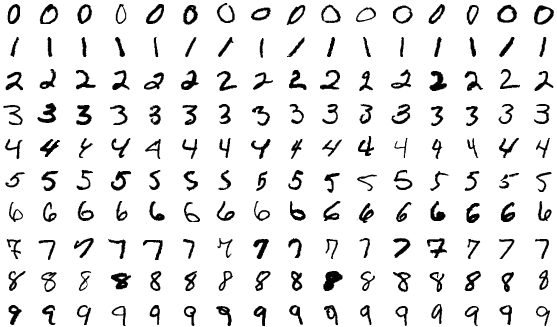

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean = (0.5, ), std = (0.5, ))])
trainset = torchvision.datasets.FashionMNIST(root='D:/Downloads/DecisionTree_RandomForest', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1024, num_workers=8, shuffle=True)
testset = torchvision.datasets.FashionMNIST(root='D:/Downloads/DecisionTree_RandomForest', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1024, num_workers=8, shuffle=False)

"""
+ Giải thích các tham số trong class FashionMNIST. Bộ dữ liệu FashionMNIST gồm 60000 tập train và 10000 tập test
root: đường dẫn lưu trữ dữ liệu. Dữ liệu được tải về sẽ lưu tại đây
num_worker: số lượng worker
train: Nếu bạn muốn lấy dữ liệu tập train thì để là True và ngược lại False là tập test
download: tải bộ dữ liệu về
transform: tham số này dùng để chuẩn hóa dữ liệu từ (0 - 255) về (0 - 1). Nếu không chuẩn hóa dữ liệu thì model sẽ không thể train tốt được.

+ Giải thích về class DataLoader.
Sau khi tải tập train và test về thì train giờ sẽ là 60000 ảnh và 10000 cho test. Sau đó chúng ta sẽ đóng 60000 ảnh train và 10000 ảnh test vào block.
batch_size: số lượng ảnh trong 1 block. Với ví dụ trên thì mình sẽ đóng 1024 ảnh vào 1 block => Như vậy chúng ta sẽ có xấp xỉ 58 block 1024 ảnh và số lượng ảnh còn dư lại là block 59.
shuffle: Nếu ta muốn xáo trộn dữ liệu mỗi lần chạy lại thì set là True và ngược lại

"""

100%|██████████| 26421880/26421880 [00:19<00:00, 1390532.45it/s]


Extracting D:/Downloads/DecisionTree_RandomForest/FashionMNIST/raw/train-images-idx3-ubyte.gz to D:/Downloads/DecisionTree_RandomForest/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 144680.87it/s]


Extracting D:/Downloads/DecisionTree_RandomForest/FashionMNIST/raw/train-labels-idx1-ubyte.gz to D:/Downloads/DecisionTree_RandomForest/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:13<00:00, 332621.13it/s]


Extracting D:/Downloads/DecisionTree_RandomForest/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to D:/Downloads/DecisionTree_RandomForest/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 46038970.13it/s]

Extracting D:/Downloads/DecisionTree_RandomForest/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to D:/Downloads/DecisionTree_RandomForest/FashionMNIST/raw



'\n+ Giải thích các tham số trong class FashionMNIST. Bộ dữ liệu FashionMNIST gồm 60000 tập train và 10000 tập test\nroot: đường dẫn lưu trữ dữ liệu. Dữ liệu được tải về sẽ lưu tại đây\nnum_worker: số lượng worker\ntrain: Nếu bạn muốn lấy dữ liệu tập train thì để là True và ngược lại False là tập test\ndownload: tải bộ dữ liệu về\ntransform: tham số này dùng để chuẩn hóa dữ liệu từ (0 - 255) về (0 - 1). Nếu không chuẩn hóa dữ liệu thì model sẽ không thể train tốt được.\n\n+ Giải thích về class DataLoader.\nSau khi tải tập train và test về thì train giờ sẽ là 60000 ảnh và 10000 cho test. Sau đó chúng ta sẽ đóng 60000 ảnh train và 10000 ảnh test vào block.\nbatch_size: số lượng ảnh trong 1 block. Với ví dụ trên thì mình sẽ đóng 1024 ảnh vào 1 block => Như vậy chúng ta sẽ có xấp xỉ 58 block 1024 ảnh và số lượng ảnh còn dư lại là block 59.\nshuffle: Nếu ta muốn xáo trộn dữ liệu mỗi lần chạy lại thì set là True và ngược lại\n\n'

+ Dữ liệu FashionMNIST gồm 10 label.
+ 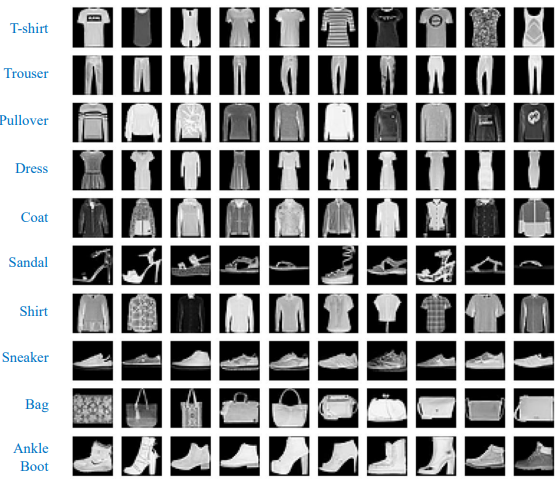

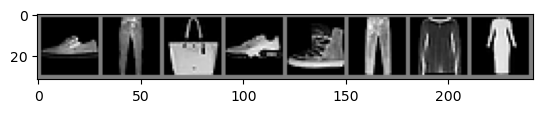

'\n+ Hàm này là dùng để visualize 8 ảnh đầu tiên của 1 block lên. Như mình đã nói ở trên thì giờ train loader của mình sẽ có tầm khoảng 59 block. Sau đó chúng ta\nlấy 8 ảnh trong block đầu tiên ra để hiển thị.\n'

In [3]:
def imshow(img):
    img = img * 0.5 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

for i, (images, labels) in enumerate(trainloader, 0):
    imshow(torchvision.utils.make_grid(images[:8]))
    break
'''
+ Hàm này là dùng để visualize 8 ảnh đầu tiên của 1 block lên. Như mình đã nói ở trên thì giờ train loader của mình sẽ có tầm khoảng 59 block. Sau đó chúng ta
lấy 8 ảnh trong block đầu tiên ra để hiển thị.
'''

In [4]:
def getModel(n_features):
    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(n_features, 256),
        nn.ReLU(),
        nn.Linear(256, 10)
    ).to(device)
    return model

'''
+ Hàm này dùng để build model. Thì như các bạn đã học về MLP thì đầu tiên chúng ta sẽ làm phẳng ảnh bằng Flatten xong sau đó đưa qua lớp Linear rồi qua hàm kích hoạt Relu và sau cùng
lớp output ở lớp Linear cuối cùng là số lượng class trong bài toán (ở bài toán này là 10). Các bạn có thể nhìn hình dưới đây để hiểu rõ hơn về kiến trúc của MLP.
+ Giải thích thêm ở lớp Linear thì trong lớp Linear sẽ tương tự như việc lan truyền thẳng. Sẽ có 2 trọng số là weight (w) và bias (b). Hai tham số này có lẽ đã rất quen trong thuật toán
Linear Regression. Sau đó nó sẽ tính toán tương tự Linear rồi kết quả của nó sẽ nằm ở node tiếp của layer tiếp theo.
'''

'\n+ Hàm này dùng để build model. Thì như các bạn đã học về MLP thì đầu tiên chúng ta sẽ làm phẳng ảnh bằng Flatten xong sau đó đưa qua lớp Linear rồi qua hàm kích hoạt Relu và sau cùng\nlớp output ở lớp Linear cuối cùng là số lượng class trong bài toán (ở bài toán này là 10). Các bạn có thể nhìn hình dưới đây để hiểu rõ hơn về kiến trúc của MLP.\n+ Giải thích thêm ở lớp Linear thì trong lớp Linear sẽ tương tự như việc lan truyền thẳng. Sẽ có 2 trọng số là weight (w) và bias (b). Hai tham số này có lẽ đã rất quen trong thuật toán\nLinear Regression. Sau đó nó sẽ tính toán tương tự Linear rồi kết quả của nó sẽ nằm ở node tiếp của layer tiếp theo.\n'

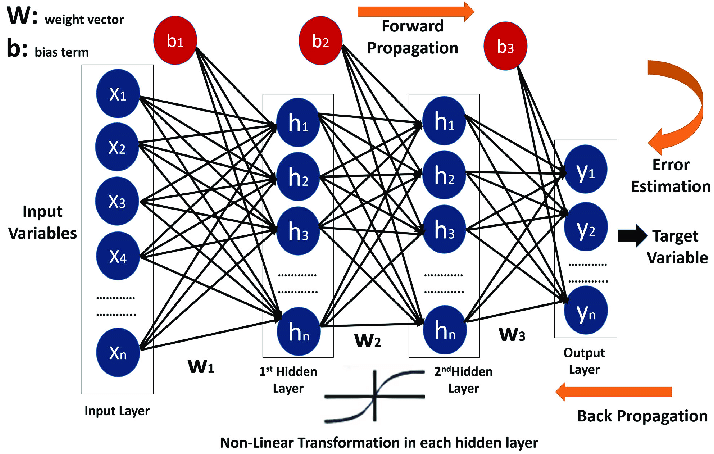

In [5]:
n_features = 28 * 28 # Đối với ảnh trong tập FashionMNIST thì size ảnh là 28x28 => Số lượng feature trong ảnh là 28 * 28 = 784
model = getModel(n_features)
lr = 0.01
optim = SGD(params = model.parameters(), lr = lr)
loss_fn = nn.CrossEntropyLoss()
model
'''
+ Ở đoạn code cell này mình sẽ tạo model, phương thức optimizer network và loss function. Một tham số cũng khá quan trọng là lr (learning rate).
+ Về phương thức optimizer thì sẽ có vài phương thức phổ biến như Adam, SGD, AdamW, ... Thì trong bài toán này mình sẽ sử dụng SGD. (các bạn có thể lên mạng để tìm hiểu thêm về SGD).
+ Hàm loss function mình sử dụng trong đây là CrossEntropyLoss. Thực tế cũng có các hàm loss khác như BCELoss (được sử dụng trong thuật toán Logistic Regression), MSELoss. Các bạn cũng có
thể tìm hiểu thêm về công thức tính toán của nó.
'''

'\n+ Ở đoạn code cell này mình sẽ tạo model, phương thức optimizer network và loss function. Một tham số cũng khá quan trọng là lr (learning rate).\n+ Về phương thức optimizer thì sẽ có vài phương thức phổ biến như Adam, SGD, AdamW, ... Thì trong bài toán này mình sẽ sử dụng SGD. (các bạn có thể lên mạng để tìm hiểu thêm về SGD).\n+ Hàm loss function mình sử dụng trong đây là CrossEntropyLoss. Thực tế cũng có các hàm loss khác như BCELoss (được sử dụng trong thuật toán Logistic Regression), MSELoss. Các bạn cũng có\nthể tìm hiểu thêm về công thức tính toán của nó.\n'

In [6]:
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad(): # hàm này là để giữ nguyên giá trị đạo hàm thường phải có khi ta muốn đánh giá model.
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy


In [7]:
n_epochs = 10
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    running_loss = 0.0
    running_correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        
        inputs, labels = inputs.to(device), labels.to(device)

        optim.zero_grad() # khởi tạo giá trị đạo hàm = 0


        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        running_loss += loss.item()


        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()

        # 2 dòng dưới đây là lan truyền ngược và optimizer tham số w và b.
        loss.backward()
        optim.step()        

    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss / (i + 1)
    test_loss, test_accuracy = evaluate(model, testloader, loss_fn)
    print(f"Epoch [{epoch + 1}/{n_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
    
    
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch [1/10], Loss: 1.8151, Accuracy: 51.69%, Test Loss: 1.4281, Test Accuracy: 66.25%
Epoch [2/10], Loss: 1.2119, Accuracy: 69.51%, Test Loss: 1.0581, Test Accuracy: 71.01%
Epoch [3/10], Loss: 0.9588, Accuracy: 72.41%, Test Loss: 0.8958, Test Accuracy: 72.62%
Epoch [4/10], Loss: 0.8374, Accuracy: 73.96%, Test Loss: 0.8092, Test Accuracy: 73.92%
Epoch [5/10], Loss: 0.7680, Accuracy: 74.94%, Test Loss: 0.7562, Test Accuracy: 74.68%
Epoch [6/10], Loss: 0.7220, Accuracy: 75.78%, Test Loss: 0.7197, Test Accuracy: 75.27%
Epoch [7/10], Loss: 0.6897, Accuracy: 76.50%, Test Loss: 0.6925, Test Accuracy: 76.02%
Epoch [8/10], Loss: 0.6645, Accuracy: 77.18%, Test Loss: 0.6707, Test Accuracy: 76.74%
Epoch [9/10], Loss: 0.6435, Accuracy: 77.81%, Test Loss: 0.6523, Test Accuracy: 77.17%
Epoch [10/10], Loss: 0.6254, Accuracy: 78.29%, Test Loss: 0.6370, Test Accuracy: 77.51%


'\nKết quả dưới đây là một kết quả tốt (chưa xét đến accuracy của model). Vì chúng ta có thể thấy train loss và test loss càng qua các epoch càng giảm và ngược lại\naccuracy càng tăng. Nếu các đường thẳng mịn như vậy thì cho thấy model đang fit tốt trên tập dữ liệu. Mình chỉ train trên 10 epoch.\n'

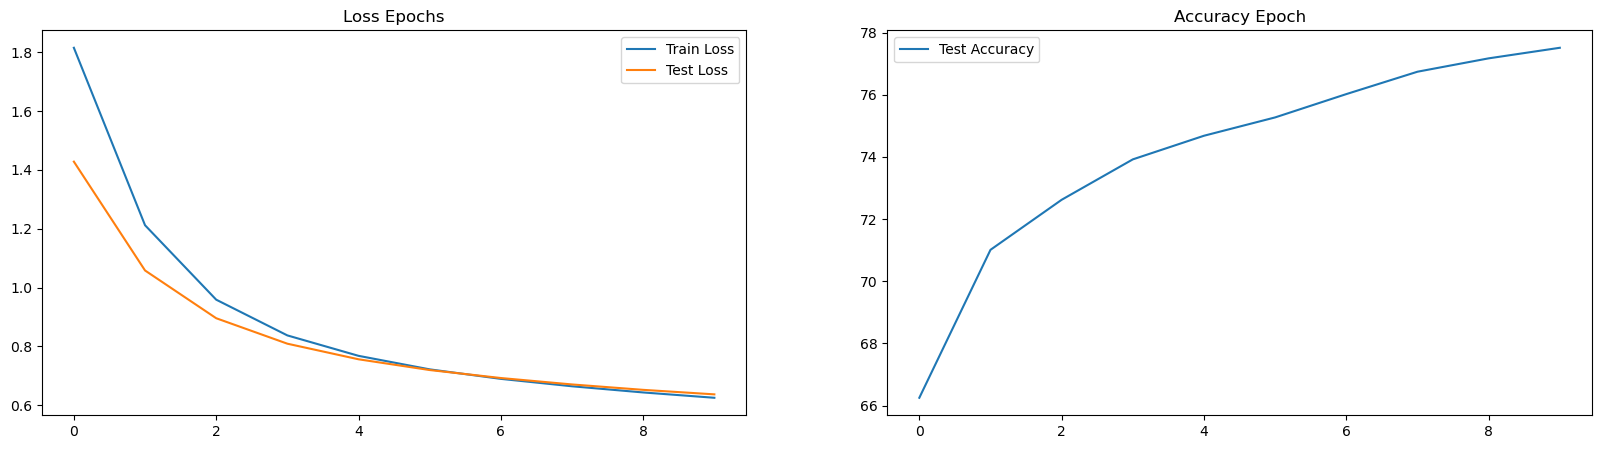

In [8]:
plt.figure(figsize = (20, 5))
plt.subplot(121)
plt.title('Loss Epochs')
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy Epoch')
plt.plot(test_accuracies, label = 'Test Accuracy')
plt.legend()


'''
Kết quả dưới đây là một kết quả tốt (chưa xét đến accuracy của model). Vì chúng ta có thể thấy train loss và test loss càng qua các epoch càng giảm và ngược lại
accuracy càng tăng. Nếu các đường thẳng mịn như vậy thì cho thấy model đang fit tốt trên tập dữ liệu. Mình chỉ train trên 10 epoch.
'''

+ Dưới đây là biểu đồ cho thấy model đang fit không ổn định với dữ liệu.
+ 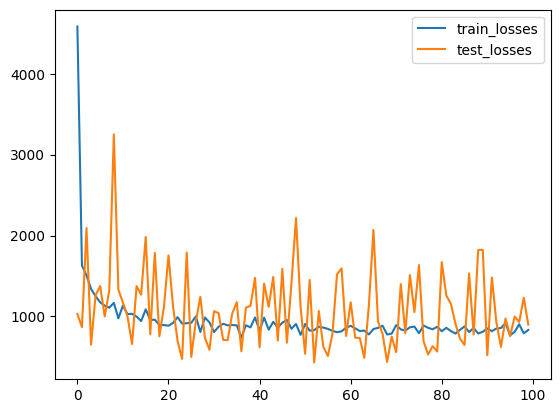
+ 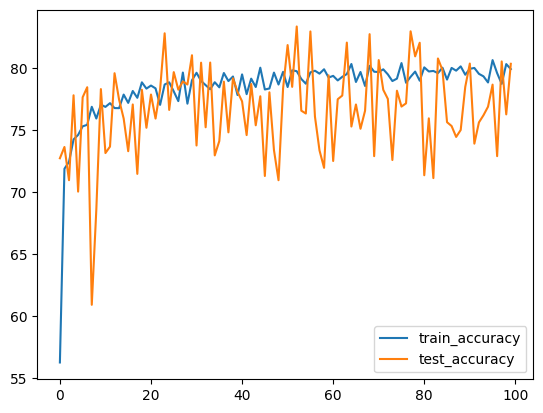

In [9]:
# Sau khi model đã được train xong thì chúng ta sẽ lưu trọng số của model lại để có thể gọi lại model mà không cần train lại.
torch.save(model, "MLP_dress.pth")